In [105]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics
plt.style.use('ggplot')

In [106]:
df = pd.read_csv('prod_with_chem.csv')
df

,Unnamed: 0,name,mfg,num_chem,chem,price,category
0,0,shape tape concealer,tarte,2,"['fragrance', 'parfum']",27.0,Face
1,0,cc+ cream with spf 50+,it cosmetics,1,['steareth'],39.5,Face
2,0,double wear stay-in-place makeup,estée lauder,1,['laureth'],43.0,Face
3,0,born this way undetectable medium-to-full cove...,too faced,0,[],39.0,Face
4,0,translucent loose setting powder,laura mercier,5,"['methylparaben', 'propylparaben', 'ethylparab...",39.0,Face
...,...,...,...,...,...,...,...
6977,0,clear lash adhesive,house of lashes,0,[],8.0,Eyes
6978,0,miami lights glitter palette,nabla,0,[],25.0,By Category
6979,0,lash freak volumizing & lengthening mascara,urban decay cosmetics,1,['steareth'],25.0,Eyes
6980,0,classic brush tip liner,ulta,0,[],9.0,ULTA Collection


# hypothesis testing - chems per brand - Face
### luxury brands will have less cancer causing chemicals per product than basic

In [107]:
df1 = df[df['category'] == 'Face']


In [108]:
df1 = df1.groupby('mfg').mean()
df1.head()

,Unnamed: 0,num_chem,price
mfg,,,
almay,0.0,1.571429,12.632857
amazing cosmetics,0.0,0.200000,32.800000
anastasia beverly hills,0.0,0.846154,27.997692
artnaturals luxe,0.0,0.000000,12.990000
au naturale,0.0,0.285714,32.000000


Now we have a dataframe with only face category grouped by mfg 

In [109]:
x = []

for num in range(len(df1['num_chem'])):
    x.append(df1['price'].iloc[num])

mean_ = (statistics.mean(x))
median_ = (statistics.mean(x))
print (statistics.mean(x))
print (statistics.median(x))
#checked to make sure that there was no significant diffrence between the two

23.35109441679961
23.0


In [110]:
basic = pd.DataFrame()
luxury = pd.DataFrame()


In [111]:
for x in range(len(df1['price'])):
    if df1['price'].iloc[x] >= mean_:
        luxury = luxury.append(df1.iloc[x])
    else:
        basic = basic.append(df1.iloc[x])
        

In [112]:
len(luxury)

61

In [113]:
len(basic)

67

In [114]:
lnum = luxury['num_chem'].tolist()
lprice = luxury['price'].tolist()

In [115]:
bnum = basic['num_chem'].tolist()
bprice = basic['price'].tolist()

[Text(0, 0, 'lux'), Text(0, 0, 'basic')]

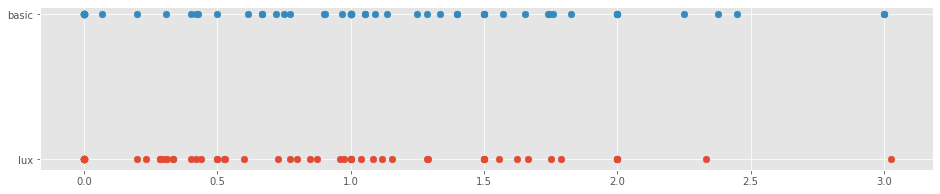

In [116]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(lnum, np.repeat(0, len(lnum)), s=45)
ax.scatter(bnum, np.repeat(1, len(bnum)), s =45)

ax.set_yticks([0, 1])
ax.set_yticklabels(["lux", "basic"])

[Text(0, 0, 'lux'), Text(0, 0, 'basic')]

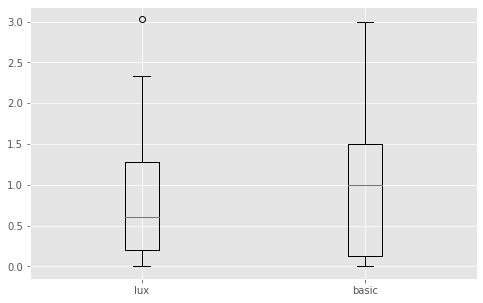

In [117]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([lnum, bnum])
ax.set_xticks([1,2])
ax.set_xticklabels(["lux", "basic"])

In [118]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [119]:
test_statistic = welch_test_statistic(lnum, bnum)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -1.23


In [120]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [121]:
df = welch_satterhwaithe_df(lnum, bnum)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 125.99


Text(0.5, 1.0, "Distribution of Welsh's Test Statistic Under the Null Hypothesis")

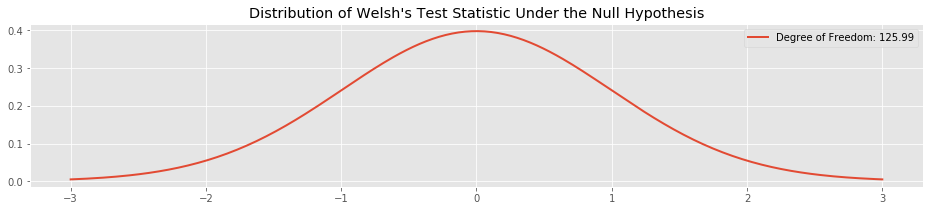

In [122]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
chemicals = stats.t(df)
ax.plot(x, chemicals.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

Text(0.5, 1.0, 'p-value Reigon')

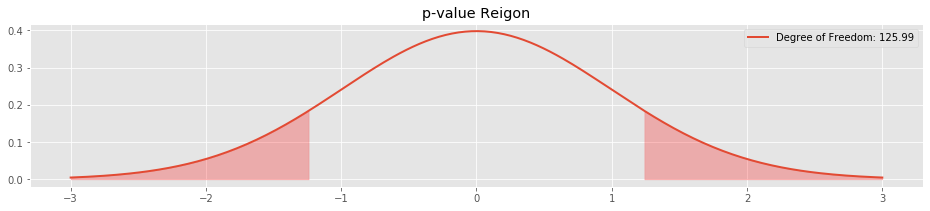

In [123]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
chemicals = stats.t(df)
ax.plot(x, chemicals.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, chemicals.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, chemicals.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

In [124]:
p_value = chemicals.cdf(test_statistic) + (1 - chemicals.cdf(-test_statistic))
print("p-value for different average number of chemicals: {:2.4f}".format(p_value))

p-value for different average number of chemicals: 0.2207


In [ ]:
p value is not less than .05 so I cannot reject null hypothesis